## Content

-UseCase

- Impact of Outliers

- Standardization

- Encoding of categorical features for DT (with large categories)

- DT for High demensionality data 

- Imbalance in DT

- Runtime complexity

- Multiclass classification 

- Using feature twice for split

- Feature importance

- Regression using Decision Tree

- Greedy Approximation of DT

- Summary



## UseCase Intro: Employee Attrition

#### You are a Data Scientist working at a Jio

The company is facing a huge problem of employee attrition


#### Why is this a problem? 

Employee Attriton has always been a major problem for companies.
- The cost of replacing an employee has always been significant due to the fact that most times:
- The company will have to pay the new employee more than the employee they are replacing
- Lots of time and resources invested in interviewing multiple candidates


#### What's the task at hand? 
Your task is to :
- Identify the likelihood of an active employee leaving the company.

This can help the company take more targeted approaches to retain the specific employees at risk of attrition

- Help identify the key indicators/factors leading to an employee leaving.

This will help the company take more proactive measures in retaining current and future employees to reduce employee dissatisfaction

- Find out the policies or strategies can be adopted based on the results to improve employee retention?


#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

Preprocessed Data

In [ ]:
!gdown 12G_J8gBel8MpspdXJruZuuMvyrm9upNb
!gdown 1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A


!gdown 1p03Ltdto8XoOdu14YlcQjzE-360SyI89
!gdown 1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx


Downloading...
From: https://drive.google.com/uc?id=12G_J8gBel8MpspdXJruZuuMvyrm9upNb
To: /content/X_test.csv
100% 51.7k/51.7k [00:00<00:00, 56.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A
To: /content/X_train.csv
100% 154k/154k [00:00<00:00, 57.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p03Ltdto8XoOdu14YlcQjzE-360SyI89
To: /content/y_test.csv
100% 743/743 [00:00<00:00, 923kB/s]
Downloading...
From: https://drive.google.com/uc?id=1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx
To: /content/y_train.csv
100% 2.21k/2.21k [00:00<00:00, 4.04MB/s]


In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({'Target': 1})


In [ ]:
X_sm.shape

(1848, 36)

In [ ]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,42,1245,12,3,0.238984,1,0,52,3,4,...,8,0.0,0.000000,1.000000,0.000000,0.895096,0.104904,0.000000,0.895096,0.104904
1844,47,827,12,3,0.236800,1,0,66,3,4,...,8,0.0,0.000000,1.000000,0.000000,0.512758,0.487242,0.000000,0.512758,0.487242
1845,29,336,14,1,0.137509,3,0,85,3,2,...,7,0.0,0.913267,0.086733,0.000000,1.000000,0.000000,0.000000,0.086733,0.913267
1846,26,1142,17,2,0.236799,3,1,33,2,1,...,1,0.0,0.000000,1.000000,0.000000,0.512576,0.487424,0.512576,0.487424,0.000000


# **Impact of outliers**


#### Question: Will outliers impact the DT ?

Outliers impact a decision tree when the depth is high i.e. overfitted model 

Imagine a scenario where
- we have 1000 datapoints at root node
- we built a tree
- After splitting agressively i.e. depth is high we got
    - 5 +ve point in one leaf nodes

There may be chance these 5 points are noise / outliers. 

Hence, outliers will only impact tree with large depth

<img src='https://drive.google.com/uc?id=1nlGGvUplV-nqDCnB13U2GVx3FN9fSTZ4'>


## **Standardization**

#### (Revision question) Did we standardize data for Linear Regression & PCA?

Yes.

#### Question: Is Standardisation  required for Decision tree?

Imagine we have a numerical feature $f_i$
- values are say, 2.1, 2.6, 2.8 and so on ..

Let's say we standardized it
- values we go -1.2, -1, 0 , .. and so on

For calculating entropy, we are using the values as threshold only as splitting criteria.

Entropy isn't dependent on value
- it depends on number of +ve/ -ve datapoints
- and in turn dependend on thresold

Threshold order won't change with standardization.

Standardization does not impact entropy and Information gain

<br>

**Key lesson**:

Though standardisation is required in optimisation based problems like Linear Regression, Logistic Regression, PCA, 
- as standardisation **doesn't effect the entropy or the Information Gain** of the data it doesn't add any value in Decision tree.




<img src='https://drive.google.com/uc?id=1TKSiPMLUt14FHs1AjAqySZQycgyhwWs0'>

# **Encoding of categorial features for DT**

Imagine we have a categorical feature with many categories  (for example: zipcode with 10,000 values)


#### Question: How can we encode  a categorical feature with many categories ?  

* We can do **"no encoding"**
 * if we did not do encoding
    - we'll get 10,000 child nodes
    - data set becomes too small in some nodes
    - prediction may suffer as we don't have enough datapoints (can be outliers or noise) in node to affirmly back our prediction
    - not a wise choice

* We can do **target encoding** 
 * covert to numerical and then give it to decision tree

* We **should not do one hot encoding**
  * Because that increases the dimensionality of the data 

**Key lesson:**
* Appropriate feature encoding depends on the model that you are using like if you are using logistic regression you can use one hat encoding but not in decision tree.




<img src='https://drive.google.com/uc?id=1gtSEg36jCNkhdaAYOPuctlWEqJEH7l2j'>

# **DT for high dimension data**

### Question: Why should we avoid DT for high dimensional data? 


If there are lots of features it takes a lot of time to check every possible split and compute entropy

Hence, time to build DT shoots up 

**So, what can be done about that.?**
* We can use distributed computing or multi-processing
 * **Distributed Computing** is a process in which the data is split and worked on different cores.
* We avoid using Decision trees as when the dimensionality is high a simple linear seperator can be used, by using logistic regression
* Either use Random forest or GBDT




<img src='https://drive.google.com/uc?id=1UcqJB8hfzbXaxnU4zwIygyshwoY1T46R'>


# **Imbalance data in DT**

#### Question: Will imbalance data impact DT? 



Recall that Entropy and Gini Impurity are fucntions of probability

* Assume  a condition where there is an imbalance in the root node 
  * **having 99% positive data **
  * **This skews the entropy or Gini Impurity**

So, we have to rebalance the data. (which is what we did in the beginning)

* We can rebalance in many ways like 
 * using class weights
 * up - samplinig
 * SMOTE can be used.  



<img src='https://drive.google.com/uc?id=1HKUqza2v3zHmYP3-zYRKWD_Mi5MUs8PX'>

# **Train/Run time complexity**

#### Question: What do you think will be run time and space complexity will be ? 

Let 
- n be the number of data points 
- m be the number of nodes and 
- d be the depth of the tree 

Then, 
* **Train time complexity** is **$O(nlog(n)*d)$**
    - where nlog(n) is the time taken to sort numerical features
    - multiplied by d, as you have to calculate split for d features

* The **Run Time complexity** of the tree of depth d is O(depth) 
    - as we only have to evaluate at max d condtions

* The **Space complexity** of the tree is O(m)
    - we only have to store **m if else condtions**

Here,  depth is the function of number of nodes i.e log(m)   
 
If $d_{best}$ is computated using cross validation the decision tree will be very efficient at runtime.




<img src='https://drive.google.com/uc?id=1lgpPR9T2IxGxWsmUH9D8hO-5NTQtJFqE'>

# **Multi class classification**

#### How will DT work for multi class classification?

Whether it is binary or multiclass, DT works the same.

We just need to calculate the Entropy or Gini Impurity.

However, there is a catch
* at the leaf node if we have more classes we take the majority class.



<img src='https://drive.google.com/uc?id=1dDWifTRTzncApzTa-M6ExppyCJj5m6-Q'>


# **Interpretibility**

Decision Trees are hyper interpretable
- as we can read them as if else condition
- can be understood by non expert


<img src='https://drive.google.com/uc?id=1S8XxE09aiBO_RK_Bte8jKIGjr81An7Ef'>



## **Using feature twice for split**

#### Question: Can we use a feature twice for splitting?



Imagine we split the root node using feature $f_1$ 

**Can we use this feature again to split the child node ?**


<img src='https://drive.google.com/uc?id=1Ve7CZ5Pb8Tufhb98AhmEg5L9rVHgm1-z'>



Let's see for both categorical as well as numerical features

Let's say we have 
- 100 +ve points
- 100 -ve points at root node.

### **Categorical feature**

We used Gender (categorical) to split the data

We got two child nodes
- Male node:
    - 70 +ve
    - 30 -ve

- Female node:
    - 30 +ve
    - 70 -ve

**Can we again use Gender to split Male node?**

No. 
Even if we use, we only have Male category data in current node.
- there will be no information gain i.e. info gain = 0







<img src='https://drive.google.com/uc?id=1g_zrbs47bI4XqaQ4lJulVnal-B2mzfhn'>



But, there's an exception
- A single categorical feature can be used more than once in different branches of tree


<img src='https://drive.google.com/uc?id=16L9ZMNk4hz9eMrafNrPxcL4w-zLfNGrt'>



### **Numerical feature**

Now, let's say we are splitting the root node numerical feature i.e. Years of Experience.

First, we found out IG for each threshold and YOE of 12 yrs was giving the best IG.
- We split the node with $YOE ≤ 12$

#### Question: Can we again use numerical feature for split?

Yes. It is possible that same feature for different threshold may give best IG among all features at child node.




<img src='https://drive.google.com/uc?id=10CQM-YGajNRnSIMlPTvUvosTnCoXFEcb'>



# **Feature Importance**

Recall,
* In case of logistic and linear regression after standardisation we can just consider absolute value of weights which give us feature importance 

But we don't have any weights in DT.

#### **Question: How can we get Feature importance for DT ? Any ideas?**

Suppose we have 10,000 datapoints @ root node.

Let us consider a feature $f_i$ which is used twice in splitting a decision tree 

* At first split let the number of data points be 5000($n_1$) and Infromation Gain is IG$_1$
* Let number of data points at second split be 500($n_2$) and Infromation Gain is IG$_2$

* We calculate feature importaance of $f_i$ by 
 - $f_i$ = IG$_1$ * $\frac{n_1}{n}$ + IG$_2$ * $\frac{n_2}{n}$ 
 * i.e $f_i$ = IG$_1$ * $\frac{5000}{10,000}$ + IG$_2$ * $\frac{500}{10,000}$ 

This is called **normalized information gain.**

* Closer to the root node, more the weightage
    - it gives more weightage based on number of datapoints it is impacting.




<img src='https://drive.google.com/uc?id=12gJv36lGDumsuJ0bdafTB1Iq8bPpbs68'>


We calculate normalized information gain for all features and 
- this Normalized IG is used as feature importances.


Do note that this is one of the popular way of calulating Feature importance.

Different libraries may use different way of calculating Feature importance i.e. implementation specific.





<img src='https://drive.google.com/uc?id=1_89mxH7bzeSeuR90uQjSwU-jPlSGkeqV'>


### Code walkthrough

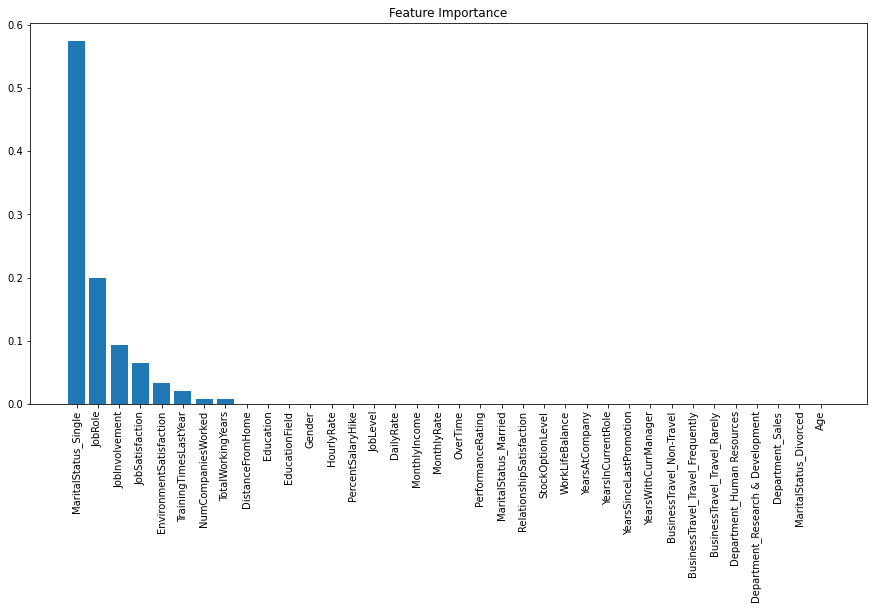

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_sm.columns))):
    feat = X_sm.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.574666
1,JobRole,0.200052
2,JobInvolvement,0.093164
3,JobSatisfaction,0.064014
4,EnvironmentSatisfaction,0.032594
5,TrainingTimesLastYear,0.020674
6,NumCompaniesWorked,0.007593
7,TotalWorkingYears,0.007242
8,Department_Human Resources,0.000000
9,BusinessTravel_Travel_Rarely,0.000000


#### What can we infer from this data ?
- StockOptionLevel affects attrition the most
- So the company can focus on providing more stocks to employees
- Then comes factors such as Job_Satisfaction and JobRole.

# **Regression using decision tree**

For Classifiaction task,  
* We had entropy and Gini Impurity to choose the feature for split. 
* At leaf node, we had datapoints with $y_i's$ and
    - we used class label of **majority data points** to predict the class label for query data point.

#### Question: Can we use Entropy or Gini Impurity for regression?
NO! Since entropy and GI are functions of probability of class labels.
- For regression, we don't have any class labels
- We have continous values.


Also, we have continous y label in leaf nodes as well. How do we calculate predicted label? 

**What do we do in the Regression?**
*  We take the mean or median of all values in the leaf node and give that value as predicted value ($y_{pred}$).




<img src='https://drive.google.com/uc?id=18nvTgpEKS4Rhcn4em4hPNgyH1eRLF14Q'>

#### Question: What is the alternative for Entropy? (Hint: Recall Linear Regression)
* here, as we saw in linear regression already,we can use **Mean Squared Error or Median Absolute error**

Let us assume a data D at root node 
- along with $y_i$ (continuous) 
- It is split into D1 and D2 

Now we calculate 
- the MSE of these points in parent node and 
- the weighted MSE for the child nodes


Now, the difference between the MSE of parent node and weighted MSE of child nodes can be used as the criteria.
 * ΔMSE = (MSE of parent node) $-$ (weighted MSE of child nodes) 

* MSE is lowest when all $y_i$'s are same and high when they are diverse


<img src='https://drive.google.com/uc?id=11QnvrLTzCUN0pDEXHb5zXSOTIL_UHV-X'>




<img src='https://drive.google.com/uc?id=1jGzM-H3p-wgW3_bVga-WMNb_QsF0x5mj'>

#### **How is MSE calculated?**
 
Let us assume we have a datapoints with target value $y$ 
* We consider the mean or medain of these points as predicted value i.e $ŷ_i$
* Now we calculate the MSE or MAE for these points, this will be the MSE of parent node.
* After the data is split 
 * We now consider the mean of all values ($y_i'$) in child node as predicted value $ŷ_i'$
 * we now calculate the MSE or MAE for these in each child node and then calculate the weighted  MSE of the child nodes.
* Then we find the difference and use this as the critearia to be compared among the features to decide the split.


<img src='https://drive.google.com/uc?id=1J8ifUk-ir3xCSsTRkr855bU0RB_ea-gF'>

### Example



Suppose we have 6 datapoints with two features ($f_1, f_2$)
- $f_1$ has categories $C_1, C_2, C_3, C_4$
- $f_2$ has categories $D_1, D_2, D_3$
- $y_i$'s are 1,2,3,4,5,6 resp.

#### Question: What will be the $ŷ$?
It'll be mean on the $y_i$'s i.e. 3.5

Suppose we are splitting by $f_1$
- There will be 4 child nodes as there are 4 categories

For category $C_1$
- We get 3 datapoints in child node
- $ŷ$ will be mean of 1,2,3 i.e. 2

For $C_2$
- We only got 1 datapoints
- MSE for this node will be zero as actual y and predicted y will be same

Similarly, we get datapoints in $C_3$ and $C_4$

- We calculate MSE for child nodes and then calculate weighted MSE for child nodes
- Then, we calculate ΔMSE i.e. MSE parent - weighted MSE of child.


#### What does ΔMSE signify?
It signifies the reduction in MSE from parent to child.

#### What is objective of regression?
We want to reduce the MSE as much as possible

So, We will pick the feature with highest ΔMSE  for split




<img src='https://drive.google.com/uc?id=1TTqz-kAYonTuDkR81BbBW_s4ZT8JxPwF'>

### Code walkthrough - scratch implementation for threshold

#### Loading data

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

In [ ]:
regression_data = pd.read_csv('regData.csv')

In [ ]:
regression_data.head()

In [ ]:
regression_data.info()

Ther are total of 600 datapoints

In [ ]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)  

#### Sorting feature to calculate threshold

In [ ]:
thresholds = X_train.sort_values().unique()

In [ ]:
thresholds

#### Calculating MSE

In [ ]:
def calculate_MSE(y):
    if(y.shape[0] == 0):
        return 0

    y_pred = np.mean(y)

    n = y.shape[0]

    mse = np.sum((y - np.mean(y))**2)
    mse /= n

    return mse

#### Calculating delta MSE

In [ ]:
def calulate_deltaMSE(y,mask):
    left_node_count = sum(mask)
    total = mask.shape[0]
    right_node_count = total - left_node_count

    parent_MSE = calculate_MSE(y)

    child_MSE = left_node_count/total*calculate_MSE(y[mask]) + right_node_count/total*calculate_MSE(y[~mask])

    deltaMSE = parent_MSE - child_MSE

    return deltaMSE

    

#### Calculating best threshold for split

In [ ]:
delta_mse_train = []

for thr in thresholds:
    mask = X_train <= thr

    delta_MSE = calulate_deltaMSE(y_train, mask)

    delta_mse_train.append(delta_MSE)




In [ ]:
delta_mse_train = np.array(delta_mse_train)

print(f'Best reduction in MSE is {delta_mse_train.max()} is for threshold: {thresholds[delta_mse_train.argmax()]}')

#### Note 
sklearn implementation creates thresholds by taking average of two values.

Let's see an example:

- Say, we have feature $X_1$ as $[1,2,3,4,5]$.

- So, thresholds here will be $[1.5, 2.5, 3.5, 4.5]$

- i.e. First threshold will be  $\frac{1 + 2}{2} = 1.5$

- Similarly, second threshold will be $\frac{2 + 3}{2} = 2.5$



### Code walkthrough - sklearn DT regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

Notice, The regressor is overfitting
- This may be due to the fact that we have low number of datapoints for training.
- we can also try playing with hyperparam tuning



#### Visualizing Decision Tree

In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


#### Visualizing Regression Line

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train') 
plt.ylabel('Y')
plt.legend()
plt.show()

## Good to know: Greedy Approximation of DT

There is no guarantee that DT being created is going to be the most opitmal one

* **Building an optimal Decision Tree is a NP-Complete problem** 
    - This means it can't be done in polynomial time
   

* So, we do **Greedy approximation**, which picks the feature which gives the best Information Gain
    - The decision taken is the one that is best at that time
    - It might not be the best for entire decision tree



<img src='https://drive.google.com/uc?id=1RPdMDPcY6yPSngdtIYo9fMA9aFmadjg6'>


## Summary of Decision Tree

To summarise everything what we have learnt about decision tree:

1.   Decision Trees work well **when the d (depth) is not too large**
2. They have a very low **Run-time complexity** 
3. **No standardisation** is needed.
4. Depth is the key **hyper-parameter**





<img src='https://drive.google.com/uc?id=1qAHiBvWa19rqX-lI49DmmdZ4ATwoW9AB'>